In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
import numpy as np
pd.set_option("display.max_columns", None)

cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

# 1. Data evaluation


In [37]:
data = pd.read_csv('marketing_campaign.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [39]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# 2. Data wrangling

In [40]:
#Drop missing value
data.dropna()
print('The missing values have been removed')

The missing values have been removed


Outliers in Income have been removed


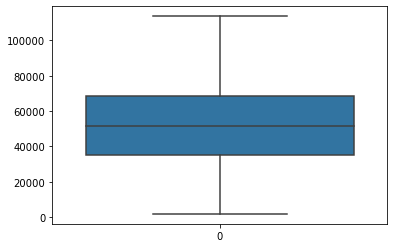

In [41]:
# Assuming that income is normally distributed
std = data['Income'].std()
mean = data['Income'].mean()
data = data[(data['Income']<(mean+3*std))]
data = data[(data['Income']>(mean-3*std))]
sns.boxplot(data=data['Income'])
print('Outliers in Income have been removed')

Outliers in Year_Birth have been removed


<AxesSubplot:xlabel='Year_Birth'>

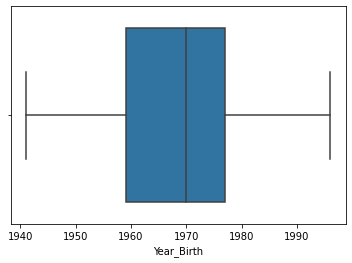

In [42]:
#Assuming this year is 2022, the max value of age is 129,which doesn't comply with common sense
data = data[(data["Year_Birth"]>1940)]
print('Outliers in Year_Birth have been removed')
sns.boxplot(x=data['Year_Birth'])

In [43]:
#The Dt_customer is a datetime value while it was parsed as text.
Dt_customer = pd.to_datetime(data['Dt_Customer'])
#To make it aligh with other feautres, I'd like to take the value relative to the most recent record.
days = [i-min(Dt_customer) for i in Dt_customer]
days = [i.days for i in days]
data['Days'] = days
print('The Dt_customer have been transformed to numerical values')
data[['Dt_Customer','Days']].head()

The Dt_customer have been transformed to numerical values


,Dt_Customer,Days
0,04-09-2012,92
1,08-03-2014,938
2,21-08-2013,591
3,10-02-2014,998
4,19-01-2014,742


In [44]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Marital_Status', 'Dt_Customer']


In [45]:
#Explore unique values in the Education feature
print('The unique values in education is:\n',data['Education'].value_counts())

The unique values in education is:
 Graduation    1113
PhD            475
Master         364
2n Cycle       198
Basic           54
Name: Education, dtype: int64


In [46]:
#Standardize the name of different educational level
education = data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

print('The unique values in education:\n', education.value_counts())

The unique values in education:
 Graduate         1113
Postgraduate      839
Undergraduate     252
Name: Education, dtype: int64


In [47]:
#Encode Education feature.The unique value in education is ordinal data, I used labelencoder to convert it.
LE = LabelEncoder()
education = LE.fit_transform(education)
data['Education'] = education
print('Education feature after tranformation\n', education)


Education feature after tranformation
 [0 0 0 ... 0 1 1]


In [48]:
#Explore unique values in the Marital_Status
print('The unique values in marital_status is:\n',data['Marital_Status'].value_counts())

The unique values in marital_status is:
 Married     854
Together    568
Single      469
Divorced    230
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [49]:
#Standardize the name of different marital status and encode them
marital = data["Marital_Status"].replace({'Alone':'Single','YOLO':'Single','Absurd':'Single','Widow':'Divorced'})
print('The uniqual value \n',marital.value_counts())
LE = LabelEncoder()
marital = LE.fit_transform(marital)
data['Marital'] = marital
print('Marital feature after tranformation\n', marital)
dic = {}
for i in LE.classes_:
    dic[i]=LE.transform([i])[0]
print('mapping rule', dic)

The uniqual value 
 Married     854
Together    568
Single      476
Divorced    306
Name: Marital_Status, dtype: int64
Marital feature after tranformation
 [2 2 3 ... 0 3 1]
mapping rule {'Divorced': 0, 'Married': 1, 'Single': 2, 'Together': 3}


In [50]:
#drop thre redundant features
drop_list = ['ID','Year_Birth','Marital_Status','Dt_Customer','Z_CostContact', 'Z_Revenue']
data = data.drop(drop_list,axis=1)
data.head()


,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days,Marital
0,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,92,2
1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,938,2
2,0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,591,3
3,0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,998,3
4,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,742,1


Spent indicating the total amount spent by the customer in various categories over the span of two years.


<AxesSubplot:xlabel='Spent', ylabel='Count'>

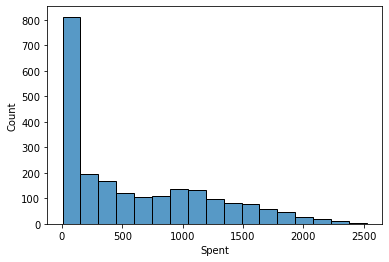

In [51]:
#Considering that the spendings on different products is a good indicator of customer purchasing power. 
#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]
print("Spent indicating the total amount spent by the customer in various categories over the span of two years.")
sns.histplot(data['Spent'])

<AxesSubplot:xlabel='Family_Size', ylabel='Count'>

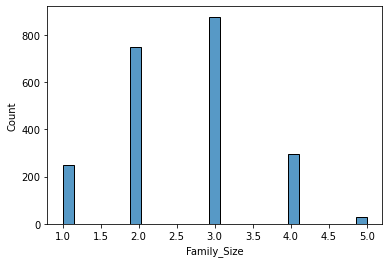

In [31]:
#The family size can be extracted according to 'Kidhome', 'Teenhome' and 'Marital'. 
data["Family_Size"] = data["Marital"].replace({0: 1, 1:2,2:1,3:2})+ data["Kidhome"]+data['Teenhome']
sns.histplot(data['Family_Size'])

In [32]:
#Data normalization
mean_vector = np.mean(data, axis=0)
data = data-mean_vector #subtract average value
std_vector = np.std(data, axis=0)
data = data/std_vector #divide standard deviation

In [33]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days,Marital,Spent,Family_Size
0,-0.891943,0.314569,-0.823719,-0.931161,0.311683,0.974178,1.548116,1.747883,2.448550,1.479812,0.849134,0.361120,1.424319,2.627869,-0.562818,0.688986,-0.2826,-0.283535,-0.280723,-0.262422,-0.117471,-0.095695,2.370363,-1.973635,0.400582,1.678816,-1.760647
1,-0.891943,-0.254830,1.038308,0.906152,-0.380005,-0.874842,-0.638885,-0.731930,-0.652580,-0.635617,-0.736024,-0.169132,-1.132924,-0.588223,-1.179804,-0.139677,-0.2826,-0.283535,-0.280723,-0.262422,-0.117471,-0.095695,-0.421876,1.664635,0.400582,-0.964140,0.447928
2,-0.891943,0.965125,-0.823719,-0.931161,-0.795017,0.354875,0.567737,-0.176268,1.335792,-0.149312,-0.040101,-0.699383,1.424319,-0.230879,1.288141,-0.554009,-0.2826,-0.283535,-0.280723,-0.262422,-0.117471,-0.095695,-0.421876,0.172342,1.383749,0.280875,-0.656360
3,-0.891943,-1.205824,1.038308,-0.931161,-0.795017,-0.874842,-0.563471,-0.667638,-0.506644,-0.586987,-0.755355,-0.169132,-0.767604,-0.945566,-0.562818,0.274655,-0.2826,-0.283535,-0.280723,-0.262422,-0.117471,-0.095695,-0.421876,1.922668,1.383749,-0.920922,0.447928
4,0.571826,0.322052,1.038308,-0.931161,1.556721,-0.394808,0.416909,-0.217598,0.150066,-0.003420,-0.562043,1.421623,0.328357,0.126465,0.054168,-0.139677,-0.2826,-0.283535,-0.280723,-0.262422,-0.117471,-0.095695,-0.421876,0.821726,-0.582584,-0.307557,0.447928


In [34]:
data.describe()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days,Marital,Spent,Family_Size
count,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03,2.204000e+03
mean,-5.399996e-17,-9.335709e-17,1.570633e-16,5.850331e-16,1.164122e-16,2.014924e-17,-7.525740e-17,-5.150649e-17,-5.672011e-17,-1.536379e-17,7.024528e-17,-2.238832e-16,-1.774896e-16,1.394831e-16,-9.827791e-17,1.934327e-16,-4.574381e-16,3.804680e-16,-4.601582e-16,-3.482292e-16,1.831692e-16,9.831569e-17,2.728207e-16,3.878728e-17,1.354029e-16,7.329285e-17,-5.037310e-17
std,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00
min,-8.919427e-01,-2.408737e+00,-8.237186e-01,-9.311609e-01,-1.694211e+00,-9.074366e-01,-6.640226e-01,-7.594833e-01,-6.890636e-01,-6.599325e-01,-8.520111e-01,-1.229635e+00,-1.498245e+00,-9.455661e-01,-1.796790e+00,-2.211336e+00,-2.826001e-01,-2.835351e-01,-2.807235e-01,-2.624218e-01,-1.174711e-01,-9.569488e-02,-4.218764e-01,-2.369286e+00,-1.565751e+00,-1.000710e+00,-1.760647e+00
25%,-8.919427e-01,-7.932586e-01,-8.237186e-01,-9.311609e-01,-8.641859e-01,-8.363204e-01,-6.137467e-01,-6.860073e-01,-6.343378e-01,-6.356173e-01,-6.780303e-01,-6.993835e-01,-7.676038e-01,-9.455661e-01,-8.713110e-01,-9.683407e-01,-2.826001e-01,-2.835351e-01,-2.807235e-01,-2.624218e-01,-1.174711e-01,-9.569488e-02,-4.218764e-01,-7.479765e-01,-5.825842e-01,-8.943265e-01,-6.563597e-01
50%,-8.919427e-01,-1.551258e-02,-8.237186e-01,-9.311609e-01,4.236744e-04,-3.799919e-01,-4.629190e-01,-4.472105e-01,-4.701603e-01,-4.654103e-01,-3.687312e-01,-1.691319e-01,-3.696300e-02,-2.308790e-01,-2.543248e-01,2.746546e-01,-2.826001e-01,-2.835351e-01,-2.807235e-01,-2.624218e-01,-1.174711e-01,-9.569488e-02,-4.218764e-01,-3.980550e-03,-5.825842e-01,-3.491127e-01,4.479279e-01
75%,5.718262e-01,8.046825e-01,1.038308e+00,9.061521e-01,8.650333e-01,5.948918e-01,1.655295e-01,3.059177e-01,2.230334e-01,1.667869e-01,2.353687e-01,3.611196e-01,6.936778e-01,4.838081e-01,6.711545e-01,6.889864e-01,-2.826001e-01,-2.835351e-01,-2.807235e-01,-2.624218e-01,-1.174711e-01,-9.569488e-02,-4.218764e-01,7.400154e-01,1.383749e+00,7.317568e-01,4.479279e-01
max,2.035595e+00,2.998672e+00,2.900334e+00,2.743465e+00,1.729643e+00,3.516580e+00,4.338428e+00,7.162140e+00,4.035599e+00,5.710670e+00,5.353303e+00,6.724138e+00,8.365406e+00,9.060053e+00,2.213620e+00,6.075300e+00,3.538569e+00,3.526900e+00,3.562224e+00,3.810660e+00,8.512736e+00,1.044988e+01,2.370363e+00,2.202204e+00,1.383749e+00,3.188127e+00,2.656503e+00


In [35]:
# data.to_csv('cleaned data.csv',index=False)